### Libraries

In [21]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')                            #for high res graph

from IPython.core.interactiveshell import InteractiveShell   
InteractiveShell.ast_node_interactivity = "all"          #for debugging purpose

from sklearn.model_selection import train_test_split

#note sklearn.cross_validation is deprecated.

### Using Iris dataset

In [22]:
# from sklearn import datasets
# iris = datasets.load_iris()

# df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                      columns= iris['feature_names'] + ['target'])
# df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
# df = df.drop('target',axis=1)
# df.head()

In [25]:
iris_df = pd.read_csv("IRIS.csv")
iris_df.head()
iris_df.columns
iris_df.sample(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
63,6.1,2.9,4.7,1.4,versicolor
23,5.1,3.3,1.7,0.5,setosa
61,5.9,3.0,4.2,1.5,versicolor
107,7.3,2.9,6.3,1.8,virginica
50,7.0,3.2,4.7,1.4,versicolor
49,5.0,3.3,1.4,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
34,4.9,3.1,1.5,0.2,setosa
0,5.1,3.5,1.4,0.2,setosa
143,6.8,3.2,5.9,2.3,virginica


### Separating Predictors and Targets

In [24]:
X = iris_df[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y = iris_df['Species']

### Train-Test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = y,random_state = 100)

Stratified random sample: Ensures that we have same class distribution for both predictors and targets.


Random_state: It is similar to seed()

### Using in-built kNN classification

kNN classification takes the mode of the nearest neighbours

In [37]:
from sklearn.neighbors import KNeighborsClassifier

#instantiate learning model (k=3)
kNN = KNeighborsClassifier(n_neighbors = 3)

#fitting the model on train data
kNN.fit(X_train,y_train)

#predict the response on test data
pred = kNN.predict(X_test)

#evaluate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy of the model is:",round(accuracy_score(y_test, pred)*100,3))

KNeighborsClassifier(n_neighbors=3)

Accuracy of the model is: 95.556


In [35]:
pred

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica'], dtype=object)

In [36]:
#confusion matrix
from sklearn.metrics import confusion_matrix

c = confusion_matrix(y_test,pred)
c

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]], dtype=int64)

The above confusion matrix is a bi-variate frequency analysis.
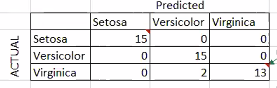
There are two observations which are actually Virginica, but got misclassified as Versicolor 

There are 15 observations in the test data for each flower


Actual    |   Prediction
---------------------------
1. setosa :     setosa     |  correct
2. veriscolor:   versicolor |  correct
3. setosa:       versicolor |  incorrect (misclassification)

Error  = no. misclassification observations / no. observations

*For above problem :Error: 2/45 = 0.0444

Accuracy = no.(#) correctly classified obs / no.(#) obeservations

*Accuracy: 1- error = 1- 0.044 = 0.95556 (or)

*A = (15+15+13)/45 = 0.95556